In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_2 = pd.read_csv("insurance.csv")
df_2.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dtype = df_2.dtypes
dtype
num_unique = df_2.nunique()
num_unique

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
pd.DataFrame({"Dtype":dtype,
              "n_unique":num_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtype,int64,object,float64,int64,object,object,float64
n_unique,47,2,548,6,2,4,1337


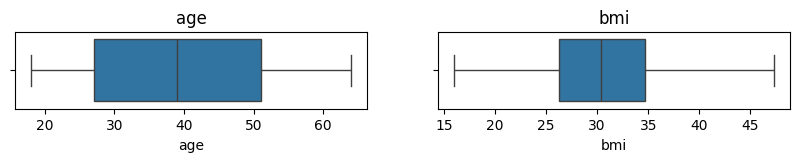

In [21]:
cat_cols = ["sex","children","smoker","region"]
df_2[cat_cols] = df_2[cat_cols].astype("category")
pd.DataFrame(df_2.dtypes).T
pd.DataFrame(df_2.isnull().sum()).T
num_cols = ["age","bmi"]
plt.figure(figsize=(10,1))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(f"{col}")
    sns.boxplot(df_2[col], orient="h")
plt.show()

In [9]:
for col in num_cols:
    Q1 = df_2[col].quantile(0.25)
    Q3 = df_2[col].quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)
    Lower_Fence = Q1 - 1.5*IQR
    Upper_Fence = Q3 + 1.5*IQR
    Lower_Outliers = df_2[df_2[col]< Lower_Fence][col].values
    Upper_Outliers = df_2[df_2[col]> Upper_Fence][col].values
    df_2[col].replace(Lower_Outliers, Lower_Fence, inplace= True)
    df_2[col].replace(Upper_Outliers,Upper_Fence,inplace= True)

In [10]:
num_cols = ["age","bmi"]
cat_cols = ["sex","children","smoker","region"]

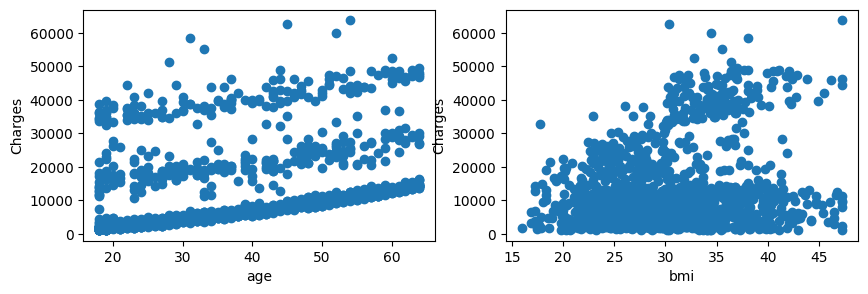

In [11]:
plt.figure(figsize=(10,3))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.xlabel(f"{col}")
    plt.ylabel(f"Charges")
    plt.scatter(x=df_2[col], y=df_2["charges"])

plt.show()

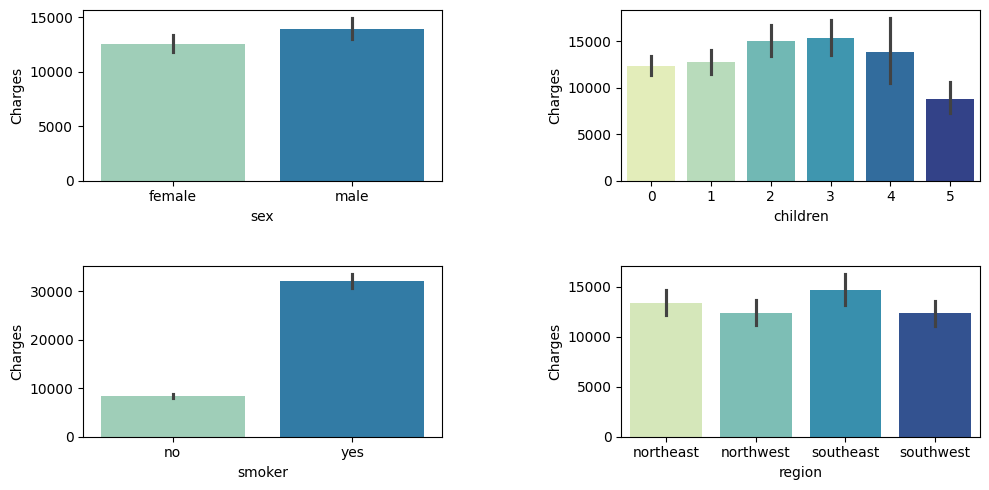

In [12]:
plt.figure(figsize=(10,5))
for i,col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    plt.xlabel(f"{col}")
    plt.ylabel(f"Charges")
    sns.barplot(x = col, y= "charges",data = df_2, palette="YlGnBu")
plt.tight_layout()
plt.subplots_adjust(hspace=0.5,wspace= 0.5)
plt.show()



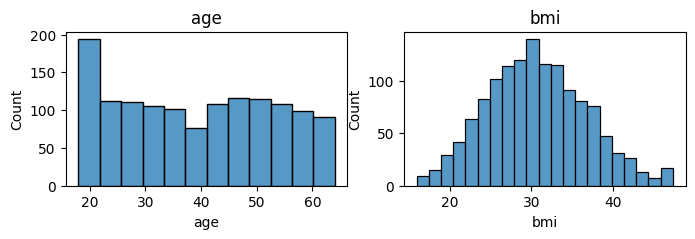

In [13]:
plt.figure(figsize=(8,2))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(f"{col}")
    sns.histplot(x=col, data =  df_2)
plt.show()

In [14]:
df_2.duplicated().sum()
df_2.drop_duplicates(keep="first",inplace=True)


In [15]:
X = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1:]

In [16]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [17]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [18]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = X.select_dtypes("number").columns
scaler = MinMaxScaler()
 
X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])
 

In [19]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=["region"])
X = encoder.fit_transform(X)

In [20]:
X

,age,sex,bmi,children,smoker,region_1,region_2,region_3,region_4
0,0.021739,female,0.381104,0,yes,1,0,0,0
1,0.000000,male,0.568465,1,no,0,1,0,0
2,0.217391,male,0.543888,3,no,0,1,0,0
3,0.326087,male,0.215289,0,no,0,0,1,0
4,0.304348,male,0.412384,0,no,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.479094,3,no,0,0,1,0
1334,0.000000,female,0.509416,0,no,0,0,0,1
1335,0.000000,female,0.666773,0,no,0,1,0,0
1336,0.065217,female,0.314076,0,no,1,0,0,0
